In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegressionCV

In [81]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\..\\'

In [82]:
Features = pd.read_excel(load_path + 'Features_FixedWindow.xlsx')

In [83]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

In [84]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [85]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [86]:
classifier = LogisticRegression(random_state = 42, solver='lbfgs', max_iter=1000, multi_class='ovr', C=0.0001)

In [87]:
result = cross_validate(classifier, X_scaled, y, cv=10, verbose=1, \
                        scoring=['accuracy', 'neg_mean_absolute_error', 'neg_mean_squared_error'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s finished


In [88]:
print(result['train_accuracy'].mean(), result['test_accuracy'].mean())
print(-result['train_neg_mean_absolute_error'].mean(), -result['test_neg_mean_absolute_error'].mean())
print(np.sqrt(-result['train_neg_mean_squared_error'].mean()), np.sqrt(-result['test_neg_mean_squared_error'].mean()))

0.3656081088621716 0.33816175737292775
0.951221893446345 0.9844702462126484
1.3241755542274662 1.3410176988710294


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [89]:
classifier.fit(X, y)

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [90]:
y_pred = classifier.predict(X)

In [91]:
confusion_mtrx = confusion_matrix(y, y_pred)

In [92]:
confusion_mtrx

array([[  5,   0,   0,   0,   2,   0,   0],
       [  0,  18,   0,   0,   8,   4,   0],
       [  0,   1,  32,   3,  20,   7,   0],
       [  0,   0,   1,  64,  36,   9,   5],
       [  0,   1,   4,  16, 160,  18,   6],
       [  0,   1,   1,   9,  33,  93,   1],
       [  0,   0,   2,   3,  13,   5,  32]], dtype=int64)

In [93]:
accuracy = accuracy_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred)

In [94]:
print(accuracy, mae, rmse)

0.6590538336052202 0.566068515497553 1.1859706362153344


In [ ]:
y_new = sort_list(y_pred, y)

plt.title('Arousal Predictions')
plt.plot(y_new, color='green')
plt.plot(sorted(y), color='red')
plt.legend(['predicted', 'actual'])

plt.savefig('arousal_fixed.eps', format='eps', dpi=1000)
plt.savefig('arousal_fixed.png', format='png', dpi=1000)

plt.show()

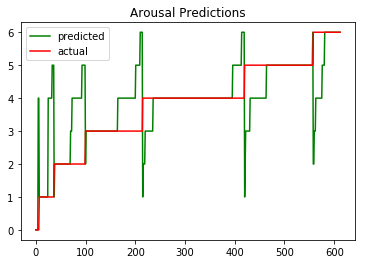

In [95]:
y_new = sort_list(y_pred, y)

plt.title('Arousal Predictions')
plt.plot(y_new, color='green')
plt.plot(sorted(y), color='red')
plt.legend(['predicted', 'actual'])

plt.savefig('arousal_fixed.eps', format='eps', dpi=1000)
plt.savefig('arousal_fixed.png', format='png', dpi=1000)

plt.show()